$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Homework 4** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Support Vector Machines**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Vasileios** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 14/5** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Name, Personal no., email** <br />

General guidelines:
* All solutions to theoretical problems, can be submitted as a single file named *report.pdf*. They can also be submitted in this ipynb notebook, but equations wherever required, should be formatted using LaTeX math-mode.
* All discussion regarding practical problems, along with solutions and plots should be specified here itself. We will not generate the solutions/plots again by running your code.
* Your name, personal number and email address should be specified above and also in your file *report.pdf*.
* All datasets can be downloaded from the course website.
* All tables and other additional information should be included.

# Theoretical problems

## [SVM, 5 points]

Consider a (hard margin) SVM with the following training points from
two classes:
\begin{eqnarray}
+1: &(2,2), (4,4), (4,0) \nonumber \\
-1: &(0,0), (2,0), (0,2) \nonumber
\end{eqnarray}

Plot these six training points, and construct by inspection the
weight vector for the optimal hyperplane. In your solution, specify
the hyperplane in terms of w and b such that $w_1 x_1 + w_2 x_2 + b =
0$. Calculate what the margin is (i.e., $2\gamma$ where $\gamma$ is the
distance from the hyperplane to its closest data point), showing all
of your work. (Hint: It may be useful to recall that the distance of a point $(a_1,a_2)$ from the line $w_1x_1 + w_2x_2 + b = 0$ is $|w_1a_1 + w_2a_2 + b|/\sqrt{w_1^2 + w_2^2}$.)


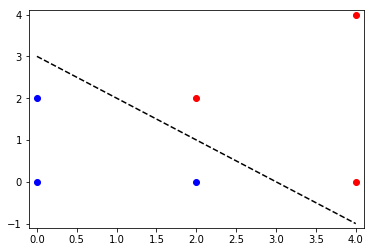

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x1s = [2,4,4]
y1s = [2,4,0]
x2s = [0,2,0]
y2s = [0,0,2]

plt.plot(x1s, y1s, 'ro')
plt.plot(x2s, y2s, 'bo')
plt.plot([0,4],[3,-1], 'k--')
plt.ylim([-1.1,4.1])
plt.xlim([-0.1,4.1])
plt.show()


## [Solution]

The plot above shows that there are 4 relevant support vectors, which can be separated by a line that passes through $(1,2)$ and $(3,0)$. This line can be desribed by the equation $x_1 + x_2 - 3 = 0$, which means that the weights are $(w_1,w_2) = (1,1)$ and the bias is $b=-3$.

Knowing this, we can calculate the margin $2\gamma$ by doubling the distance to the any of the 4 closest points. To simplify calculations we will choose the point (2,0).

$2\gamma = 2\frac{|w_1a_1 + w_2a_2 + b|}{\sqrt{w_1^2 + w_2^2}} = 2\frac{|2 - 3|}{\sqrt{1+1}} = \frac{2}{\sqrt{2}} = \sqrt{2}$

## [SVM cont'd, 5 points]


Consider the same problem from above.

a. Write the primal formulation of the SVM **for this specific example** i.e. you have to specialise the general formulation for the set of inputs given.

b. Give the optimal primal solution **for this specific**.

c. Write the dual formulation **for this specific**.

d. Give the optimal dual solution, comment on support vectors.

## [Solution]

a) The primal formulation is:

$\underset{\bf{w}}{\text{argmin }} \frac{1}{2}\bf{w^Tw}$ $= \underset{\bf{w}}{\text{argmin }} \frac{1}{2}(w_1^2 + w_2^2)$

subject to following constraints (one for each datapoint):

$(2 w_1 + 2 w_2 + b) \geq 1$

$(4 w_1 + 4 w_2 + b) \geq 1$

$(4 w_1 + 0 w_2 + b) \geq 1$

$-(0 w_1 + 0 w_2 + b) \geq 1$

$-(2 w_1 + 0 w_2 + b) \geq 1$

$-(0 w_1 + 2 w_2 + b) \geq 1$

b)

(6) and (1) gives $(2 w_1) \geq 2$, this means that $w_1 \geq 1$

(5) and (1) gives $(2 w_2) \geq 2$, this means that $w_2 \geq 1$

Since we want to minimize the absolute value of the weight vector, we choose the smallest possible weights: $w_1 = 1$ and $w_2 = 1$.

(1) now becomes $(2 + 2 + b) \geq 1$ which gives that $b >= -3$

(5) now becomes $-(2*1 + 0*1 + b) \geq 1$ which gives that $b <= -3$

So $b = -3$.

c) The dual formulation is

$\underset{\bf{\alpha}}{\text{argmax }} \Sigma_{n=1}^N \alpha_n - \frac{1}{2}\Sigma_{n,m=1}^N \alpha_n \alpha_m t_n t_m \bf{x_n^Tx_m}$

subject to:

$\Sigma_{n=1}^N \alpha_n t_n = \alpha_1 + \alpha_2 + \alpha_3 + \alpha_4 + \alpha_5 + \alpha_6$ 


In order to get an easier overview of the double sum we can write a matrix that is defined as $Z = t_n t_m \bf{x_n^Tx_m}$ 

In our case, this matrix is:

$Z = \left[ \begin{matrix}
8  & 16 & 8  & 0 & 4 & 4 \\
16 & 32 & 16 & 0 & 8 & 8 \\
8  & 16 & 0  & 0 & 8 & 0 \\
0  & 0  & 0  & 0 & 0 & 0 \\
4  & 8  & 8  & 0 & 4 & 0 \\
4  & 8  & 0  & 0 & 0 & 4 \\
\end{matrix} \right]$








# Practical problems

All data files can be loaded using the following code for example:
```python
import numpy as np
data = np.loadtxt('d1.txt')
X = data[:,:2]
Y = data[:,-1]
```

For this assigment, you may use sklearn.svm.SVC or sklearn.svm.NuSVC. 

## [SVM, 5 points]

Consider the dataset **d1.txt** having two-dimensional points $X$ and corresponding labels $Y$.

a. Train an SVM (with linear kernel) on the above data.

b. Plot the data and the separating hyperplane of the trained classifier. Color the points of one class red and the other blue. Mark points that could not be separated correctly. Also, mark the support vectors.

c. Does the classifier have bias, and if so, what is it?

d. What is the (soft) margin?

## [Solution]

c. It's difficult to say whether the classifier shown in the figure below is completely unbiased.

d. The margin is approximately 0.998

margin =  0.9982716405894544
b =  2.4538428026349837


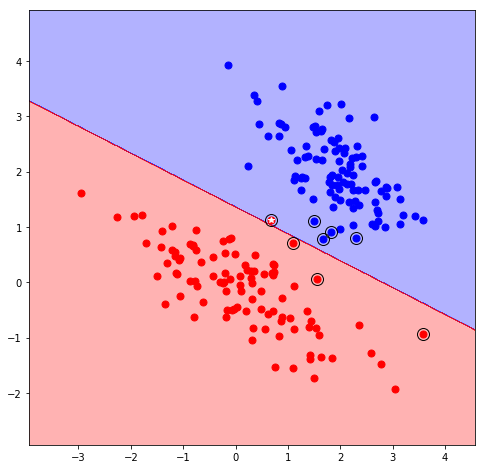

In [9]:
import numpy as np
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors

data = np.loadtxt('d1.txt')
X = data[:,:2]
Y = data[:,-1]
kernel = 'linear'
clf = SVC(kernel=kernel)
clf.fit(X, Y) 

red_X = X[Y==1]
blue_X = X[Y==-1]
        
plt.figure(figsize = (8, 8))
plt.plot(red_X[:,0], red_X[:,1], 'ro', ms = 7)
plt.plot(blue_X[:,0], blue_X[:,1], 'bo', ms = 7)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap, norm = from_levels_and_colors([-1,0,1], ['b', 'r'])
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap, norm=norm)

wrong = np.nonzero(clf.predict(X)-Y)[0]
for i in wrong:
    plt.plot(X[i,0], X[i,1], 'w*', alpha=1, ms=6)

s_indices = clf.support_

for s in s_indices:
    plt.plot(X[s,0], X[s,1], 'ko', ms=12, mfc='none')

gamma = 1 / np.linalg.norm(clf.coef_)
print("margin = ", 2*gamma)

b = clf.intercept_[0]
print("b = ", b)




## [Kernels, 5 points]

Download the dataset **d2.txt**. Consider the following kernels.

* Linear kernel
* Quadratic kernel 
* Radial Basis Function (RBF) kernel

a. Train an SVM with the linear kernel on all of the data (d2.txt). Plot the data. Color the points of one class red and the other blue. Mark points that could not be separated correctly by the trained model.

b. Plot the decision surfaces for the Quadratic and RBF kernel seperately.

## [Solution/Discussion]

The three figures below show the results for the 3 different kernels. The background colors indicate the decision boundary and the blue/red circles are the datapoints. Additionally a white star is added on top of any point that was misclassified.

a)
The linear kernel (figure 1) was a horrible fit since it was completely unable to create a separation boundary between the classes (the line is far off the plot). Every single blue point was misclassified as a red as can be seen by the myriad of white stars.

b)
Both the quadratic and the rbf kernel perform excellently on this dataset since it is circular in nature. Every point is correctly classified and the decision boundary matches our data very well.

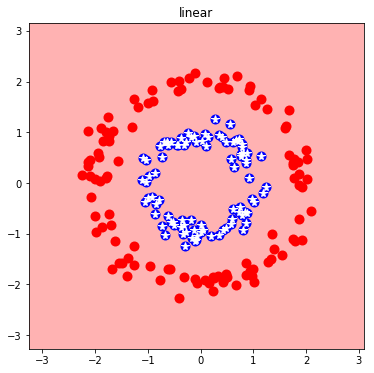

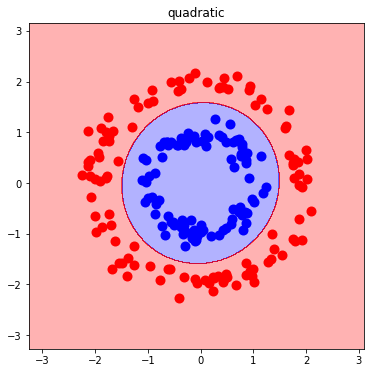

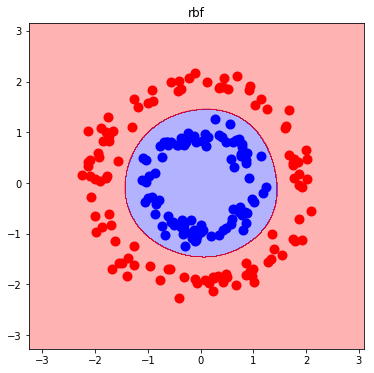

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
from sklearn.svm import SVC

data = np.loadtxt('d2.txt')
X = data[:,:2]
Y = data[:,-1]

clf_names = ('linear', 'quadratic', 'rbf')
clfs = [SVC(kernel='linear'), SVC(kernel='poly', degree=2), SVC(kernel='rbf')]
[clf.fit(X, Y) for clf in clfs]

red_X = X[Y==1]
blue_X = X[Y==-1]

cmap, norm = from_levels_and_colors([-1,0,1], ['b', 'r'])
    
for (i, clf_name) in enumerate(clf_names):
    clf = clfs[i]
    plt.figure(figsize=(6,6))

    plt.plot(red_X[:,0], red_X[:,1], 'ro', mew=2, ms=8)
    plt.plot(blue_X[:,0], blue_X[:,1], 'bo', mew=2, ms=8)

    preds = clf.predict(X)
    mistakes = X[preds!=Y]
    plt.plot(mistakes[:,0], mistakes[:,1], 'w*', ms=8)

    # Plot contours
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap, norm=norm)

    plt.title(clf_name)
